# Introdução aos métodos discretos

Nome: Ana Beatriz Nogueira Rubião Graça

# Lista 13

### 1) Resolver o seguinte problema de valor de contorno:
\begin{eqnarray}
\label{eq1}
-u''(x) + u(x) = x,\hspace{1cm} 0 \leqslant x \leqslant 1 \\
u(0) = 1 \\
u(1) = 2
\end{eqnarray}

In [1]:
import numpy as np
import matplotlib.pyplot as plt

a) Escreva a formulação variacional do problema de valor de contorno, apresentando os espaços para $u$ e $v$

$-u" + u = x$\
Multiplicando por uma função teste v:\
$ -u"v + uv = xv $

Aplicando integral para o domínio:\
$\int_{0}^{1} -u"v \: dx + \int_{0}^{1}uv\:dx = \int_{0}^{1}xv\:dx$

Subistituinfo $\int_{0}^{1} -u"v \: dx$ :\
$\int_{0}^{1} u'v' \: dx -u'v \: |^1_0 + \int_{0}^{1}uv\:dx = \int_{0}^{1}xv\:dx$

Sendo o espaço de $u$ denotado por \
$L^2(I) = \left\{ u: I → 	\mathbb{R} , ∫u(x)^2 < ∞ \right\} $

E o espaço de $v$\
$V_0 = \left\{ v:||v||_{L^2(I)} < ∞, ||v'||_{L^2(I)} < ∞ , v(0)=v(1) = 0\right\} $

Como $v = 0$ em $x = 0$ e $x = 1$:\
$\int_{0}^{1} u'v' \: dx  + \int_{0}^{1}uv\:dx = \int_{0}^{1}xv\:dx, ∀v ∈ V_0 $ 

b) Defina as funções base no elemento de referência

In [21]:
def phi_1(t):
    return 0.5*(1-t)
    

def phi_2(t):
    return 0.5*(1+t)


c) Construa a matriz de rigidez usando a quadratura de Gauss com 2 pontos.
Defina a matriz local, que será utilizada para construir a matriz global.

In [34]:
def Matriz(x):
    n = len(x)
    h = x[1] - x[0]
    # matriz global
    K = np.zeros((n,n))
    # matriz local
    Ke = np.zeros((2,2))
    # pesos e pontos da Quadratura de Gauss
    w = [1,1]
    t = [-np.sqrt(3)/3, np.sqrt(3)/3]

    dphi = [-0.5*2/h,0.5*2/h]

    #Construindo Ke
    Ke[0][0] = w[0]*dphi[0]*dphi[0]*h/2 + w[1]*dphi[0]*dphi[0]*h/2 + w[0]*(phi_1(t[0])*phi_1(t[0])*h/2)+w[1]*(phi_1(t[1])*phi_1(t[1])*h/2)   #11
    Ke[0][1] = w[0]*dphi[0]*dphi[1]*h/2 + w[1]*dphi[0]*dphi[1]*h/2 + w[0]*(phi_1(t[0])*phi_2(t[0])*h/2)+w[1]*(phi_1(t[1])*phi_2(t[1])*h/2)   #12
    Ke[1][0] = w[0]*dphi[1]*dphi[0]*h/2 + w[1]*dphi[1]*dphi[0]*h/2 + w[0]*(phi_2(t[0])*phi_1(t[0])*h/2)+w[1]*(phi_2(t[1])*phi_1(t[1])*h/2)   #21
    Ke[1][1] = w[0]*dphi[1]*dphi[1]*h/2 + w[1]*dphi[1]*dphi[1]*h/2 + w[0]*(phi_2(t[0])*phi_2(t[0])*h/2)+w[1]*(phi_2(t[1])*phi_2(t[1])*h/2)   #22

    # Construindo K
    for i in range(n):
      for j in range(n):
        if(i==j):
          if(i==0):
            K[i,j] = Ke[0,0]
            K[i,j+1] = Ke[0,1]
          elif(i==n-1):
            K[i,j-1] = Ke[1,0]
            K[i,j] = Ke[1,1]
          else:
            K[i,j-1] = K[i,j-1] + Ke[1,0]
            K[i,j] = K[i,j] + Ke[0,0] + Ke[1,1]
            K[i,j+1] = K[i,j+1] + Ke[0,1]
    
    return K

d) Construa o vetor de carga usando a quadratura de Gauss com 2 pontos.
Defina o vetor local, que será utilizado para construir vetor global.

In [48]:
def Vetor(x, f):
    n = len(x)
    h = x[1] - x[0]
    b = np.zeros(n)
    w = [1,1]
    t = [-np.sqrt(3)/3, np.sqrt(3)/3]
    
    for i in range(n-1):
      be = np.zeros(2)
      ind = i
      xl = x[ind:ind+2]
      #encontrando x(t) = h/2*t+(x1+x0)/2
      xt = np.zeros(2)
      xt[0] = (xl[1] - xl[0])*t[0]/2 + (xl[1] + xl[0])/2
      xt[1] = (xl[1] - xl[0])*t[1]/2 + (xl[1] + xl[0])/2

      #encontrando be
      for j in range(2):
        be[0] = be[0] + f(xt[0])*phi_1(t[j])*w[j]*h/2
        be[1] = be[1] + f(xt[1])*phi_2(t[j])*w[j]*h/2

      for j in range(2):
        b[ind+j] = b[ind+j] + be[j]
    return b


e) Construa a função modifica a matriz de rigidez para aplicar as condições de contorno de Dirichlet. 

In [55]:
def CondicaoContorno(A, b, ua, ub,h):
    n = len(b)
    
    A[0,:] = 0
    A[:,0] = 0
    A[0,0] = 1

    A[n-1,:] = 0
    A[:,n-1] = 0
    A[n-1,n-1] = 1

    b[0] = ua
    b[1] = b[1] + ua/h
    b[n-1] = ub
    b[n-2] = b[n-2] + ub/h
    
    return A,b

Função de que executa as etapas do MEF usando as funções anteriores, onde n é o número de nós da malha.

In [56]:
def MEF(n):
    # discretizacao de I=[0,1]
    x = np.linspace(0,1,n)    
    f = lambda x: x
    h = x[1] - x[0]
    # monta sistema
    A = Matriz(x)
    b = Vetor(x,f)

    print('Sistema sem condicoes de contorno')
    print(A)
    print(b)

    # aplica condicoes de contorno
    ua, ub = 1.0, 2.0
    A,b = CondicaoContorno(A,b,ua,ub,h)
   
    print('Apos condicao de contorno')
    print(A)
    print(b)
    
    # calcula solucao
    uh = np.linalg.solve(A,b)

    print('Solucao u')
    print(uh)
    
    return x, uh

e) Plote o gráfico da aproximação para 5, 9, 17, 33 e 65 nós.
Compare com a solução exata do problema, dada por $u(x) = \frac{1}{6}(-x^3 + 7x + 6)$

In [57]:
def analitica(x): #Resolvi na mão (mas também não ia calcular os coeficientes: u(x) = Ae^x + Be^(-2) + x)
  B = (2-1-np.exp(1))/(np.exp(-1)-np.exp(1))
  A = 1-B

  return A*np.exp(x)+B*np.exp(-x)+x

Sistema sem condicoes de contorno
[[ 4.08333333 -3.95833333  0.          0.          0.        ]
 [-3.95833333  8.16666667 -3.95833333  0.          0.        ]
 [ 0.         -3.95833333  8.16666667 -3.95833333  0.        ]
 [ 0.          0.         -3.95833333  8.16666667 -3.95833333]
 [ 0.          0.          0.         -3.95833333  4.08333333]]
[0.0066039 0.0625    0.125     0.1875    0.1183961]
Apos condicao de contorno
[[ 1.          0.          0.          0.          0.        ]
 [ 0.          8.16666667 -3.95833333  0.          0.        ]
 [ 0.         -3.95833333  8.16666667 -3.95833333  0.        ]
 [ 0.          0.         -3.95833333  8.16666667  0.        ]
 [ 0.          0.          0.          0.          1.        ]]
[1.     4.0625 0.125  8.1875 2.    ]
Solucao u
[1.         1.17615368 1.40027497 1.68125572 2.        ]


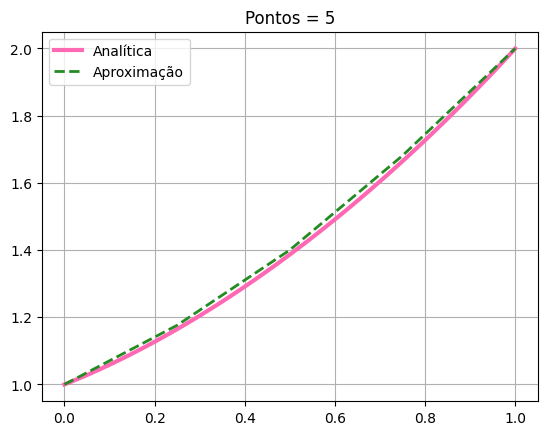

Sistema sem condicoes de contorno
[[ 8.04166667 -7.97916667  0.          0.          0.          0.
   0.          0.          0.        ]
 [-7.97916667 16.08333333 -7.97916667  0.          0.          0.
   0.          0.          0.        ]
 [ 0.         -7.97916667 16.08333333 -7.97916667  0.          0.
   0.          0.          0.        ]
 [ 0.          0.         -7.97916667 16.08333333 -7.97916667  0.
   0.          0.          0.        ]
 [ 0.          0.          0.         -7.97916667 16.08333333 -7.97916667
   0.          0.          0.        ]
 [ 0.          0.          0.          0.         -7.97916667 16.08333333
  -7.97916667  0.          0.        ]
 [ 0.          0.          0.          0.          0.         -7.97916667
  16.08333333 -7.97916667  0.        ]
 [ 0.          0.          0.          0.          0.          0.
  -7.97916667 16.08333333 -7.97916667]
 [ 0.          0.          0.          0.          0.          0.
   0.         -7.97916667  8.0416666

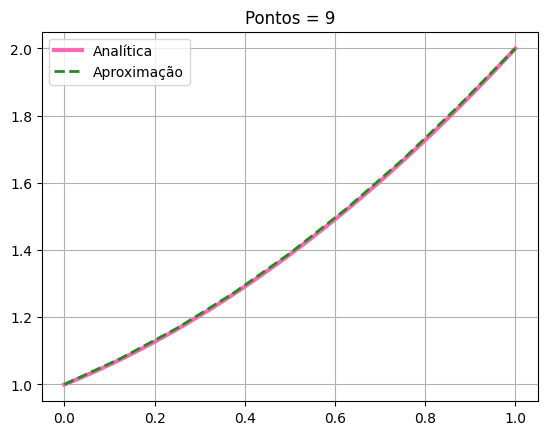

Sistema sem condicoes de contorno
[[ 16.02083333 -15.98958333   0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.        ]
 [-15.98958333  32.04166667 -15.98958333   0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.        ]
 [  0.         -15.98958333  32.04166667 -15.98958333   0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.        ]
 [  0.           0.         -15.98958333  32.04166667 -15.98958333
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.        ]
 [  0.           0.           0.         -15.98958333  32.04166667
  -15.98958333   0.           0.           0.           0.
    0.  

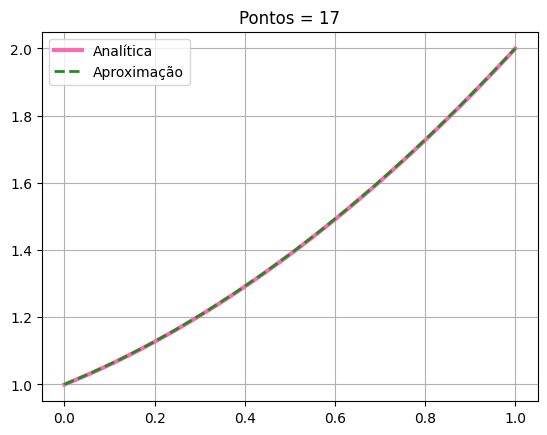

Sistema sem condicoes de contorno
[[ 32.01041667 -31.99479167   0.         ...   0.           0.
    0.        ]
 [-31.99479167  64.02083333 -31.99479167 ...   0.           0.
    0.        ]
 [  0.         -31.99479167  64.02083333 ...   0.           0.
    0.        ]
 ...
 [  0.           0.           0.         ...  64.02083333 -31.99479167
    0.        ]
 [  0.           0.           0.         ... -31.99479167  64.02083333
  -31.99479167]
 [  0.           0.           0.         ...   0.         -31.99479167
   32.01041667]]
[0.00010319 0.00097656 0.00195312 0.00292969 0.00390625 0.00488281
 0.00585938 0.00683594 0.0078125  0.00878906 0.00976562 0.01074219
 0.01171875 0.01269531 0.01367188 0.01464844 0.015625   0.01660156
 0.01757812 0.01855469 0.01953125 0.02050781 0.02148438 0.02246094
 0.0234375  0.02441406 0.02539062 0.02636719 0.02734375 0.02832031
 0.02929688 0.03027344 0.01552181]
Apos condicao de contorno
[[  1.           0.           0.         ...   0.           0.
   

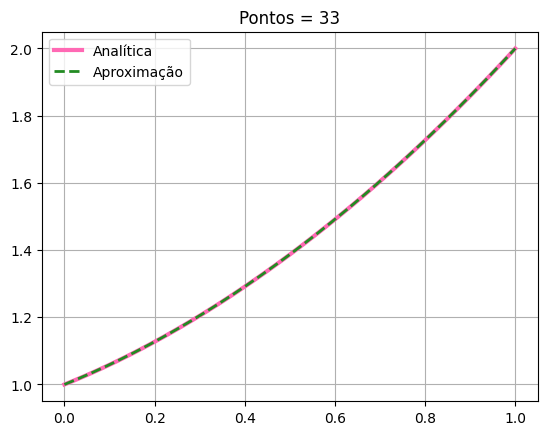

Sistema sem condicoes de contorno
[[ 64.00520833 -63.99739583   0.         ...   0.           0.
    0.        ]
 [-63.99739583 128.01041667 -63.99739583 ...   0.           0.
    0.        ]
 [  0.         -63.99739583 128.01041667 ...   0.           0.
    0.        ]
 ...
 [  0.           0.           0.         ... 128.01041667 -63.99739583
    0.        ]
 [  0.           0.           0.         ... -63.99739583 128.01041667
  -63.99739583]
 [  0.           0.           0.         ...   0.         -63.99739583
   64.00520833]]
[2.57964924e-05 2.44140625e-04 4.88281250e-04 7.32421875e-04
 9.76562500e-04 1.22070312e-03 1.46484375e-03 1.70898438e-03
 1.95312500e-03 2.19726562e-03 2.44140625e-03 2.68554688e-03
 2.92968750e-03 3.17382812e-03 3.41796875e-03 3.66210938e-03
 3.90625000e-03 4.15039062e-03 4.39453125e-03 4.63867188e-03
 4.88281250e-03 5.12695312e-03 5.37109375e-03 5.61523438e-03
 5.85937500e-03 6.10351562e-03 6.34765625e-03 6.59179688e-03
 6.83593750e-03 7.08007812e-03 7.32

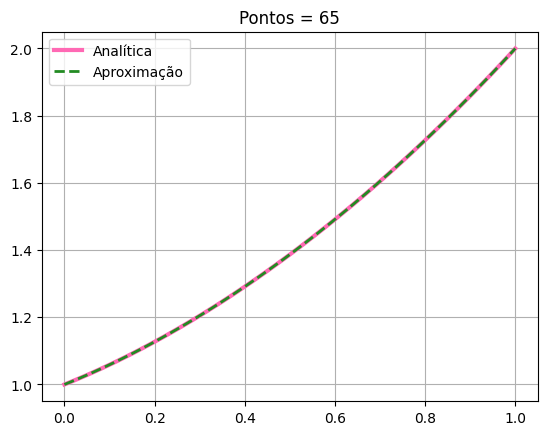

In [60]:
n = np.array([5,9,17,33,65])
for i in range(len(n)):
  x, uh = MEF(n[i])

  xx = np.linspace(0, 1, 100)

  plt.figure()
  plt.plot(xx, analitica(xx), '-', label = 'Analítica',color='hotpink',linewidth=3)
  plt.plot(x, uh, '--', label = 'Aproximação',color='forestgreen',linewidth=2)
  plt.legend()
  plt.title("Pontos = "+format(str(n[i])))
  plt.grid()
  plt.show()
